In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
drivers = pd.read_csv(
    "../files/input/drivers.csv",
    sep=",",
    thousands=None,
    decimal=".",
)
drivers.head()

In [ ]:
timesheet = pd.read_csv(
    "../files/input/timesheet.csv",
    sep=",",
    thousands=None,
    decimal=".",
)
timesheet.head()

In [ ]:
mean_timesheet = timesheet.groupby("driverId").mean()
mean_timesheet.head()

In [ ]:
mean_timesheet.pop("week")
mean_timesheet.head()

In [ ]:
mean_hours_logged_by_driver = timesheet.groupby("driverId")["hours-logged"].transform(
    "mean"
)
mean_hours_logged_by_driver.head()

In [ ]:
timesheet_with_means = timesheet.copy()
timesheet_with_means["mean_hours-logged"] = mean_hours_logged_by_driver
timesheet_with_means.head(15)

In [ ]:
timesheet_with_means.tail(15)

In [ ]:
timesheet_below = timesheet_with_means[
    timesheet_with_means["hours-logged"] < timesheet_with_means["mean_hours-logged"]
]
display(timesheet_below.head(), timesheet_below.tail())

In [ ]:
sum_timesheet = timesheet.groupby("driverId").sum()
sum_timesheet.head(10)

In [ ]:
sum_timesheet = sum_timesheet[["hours-logged", "miles-logged"]]
sum_timesheet.head()

In [ ]:
timesheet.groupby("driverId")["hours-logged"].agg(["min", "max"])

In [ ]:
sum_timesheet.head()

In [ ]:
summary = pd.merge(
    sum_timesheet,
    drivers[["driverId", "name"]],
    on="driverId",
)
summary

In [ ]:
import os

if not os.path.exists("../files/output"):
    os.makedirs("../files/output")

summary.to_csv(
    "../files/output/summary.csv",
    sep=",",
    header=True,
    index=False,
)

In [29]:
top10 = summary.sort_values(by="miles-logged", ascending=False).head(10)
top10

,driverId,hours-logged,miles-logged,name
1,11,3642,179300,Jamie Engesser
0,10,3232,147150,George Vetticaden
23,33,2759,139285,Sridhara Sabbella
15,25,2723,139180,Jean-Philippe Playe
29,39,2745,138788,David Kaiser
5,15,2734,138750,Rohit Bakshi
25,35,2728,138727,Emil Siemes
11,21,2751,138719,Jeff Markham
31,41,2723,138407,Greg Phillips
19,29,2760,138255,Teddy Choi


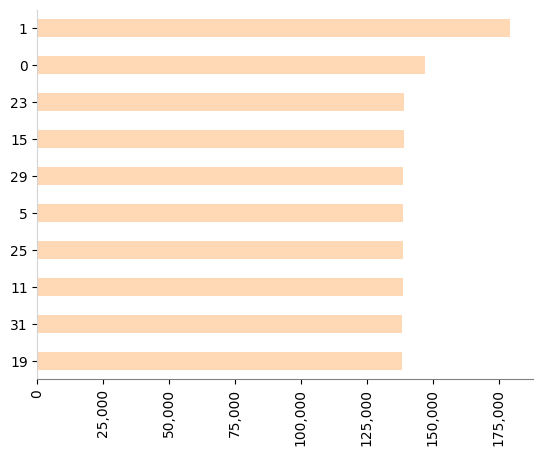

In [30]:
# Paleta de colores:
#   tab:blue     tab:red       tab:pink
#   tab:orange   tab:purple    tab:gray
#   tab:green    tab:brown     tab:olive
#   tab:cyan
top10["miles-logged"].plot.barh(color="tab:orange", alpha=0.3)

plt.gca().invert_yaxis()

plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)

plt.xticks(rotation=90)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

if not os.path.exists("../files/plots"):
    os.makedirs("../files/plots")

plt.savefig("../files/plots/top10_drivers.png", bbox_inches="tight")
